# Example/Testing for Frequency Domain PN Amplitudes

In [11]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
# %matplotlib auto
%matplotlib inline
# Import useful things
from kerr import rgb,gmvpfit,modelrd,anglep,qnmfit,leaver,ndflatten,sunwrap,magenta,alert,green,modelrd,mmrdnp
from nrutils import scsearch,gwylm,jf14067295,Mf14067295
from nrutils.core.nrsc import lswfafd
from nrutils.generate import pn
# Setup plotting backend
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
#
from numpy import *
from numpy.linalg import pinv
#
from scipy.optimize import minimize
#
import pickle
import lalsimulation as lalsim

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load NR data and compare inpiral to PN code fr different modes

In [69]:
# Find Simulation
A = scsearch(q=2,institute='sxs',verbose=True,unique=True)

[scsearch]>> Found institute (='sxs') keyword.
[scsearch]>> Found q (=2) keyword.
[scsearch]>> Found unique (=True) keyword.
[scsearch]>> Found validate_remnant (=False) keyword.
[scsearch]>> Found verbose (=True) keyword.
## Found 2 unique simulations:
[0001][sxs] SXS0169: qc-ns-q2.00	(SXS0169)
[0002][sxs] SXS0162: qc-1chi0.60-sa-q2.00	(SXS0162)



In [70]:
# Select desired simulation
a = A[1]

In [71]:
# Load waveform data
lmlist = [ (2,2), (2,1), (3,3), (3,2), (4,4), (4,3) ]
y = gwylm( a, lm=lmlist, verbose=True, clean=True )

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found lm (=[(2, 2), (2, 1), (3, 3), (3, 2), (4, 4), (4, 3)]) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x135063cb0>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 2), (2, 1), (3, 3), (3, 2), (4, 4), (4, 3)]
(load)>> Loading: rMPsi4_Y_l2_m2.asc
(**) Warning: No dt given to gwf(). We will assume that the input waveform array is in geometric units, and that dt = 0.293461 will more than suffice.
(**) Warning: No dt given to gwf(). We will assume that the input waveform array is in geometric units, and that dt = 0.293461 will more than suffice.
(load)>> Loading: rMPsi4_Y_l2_m1.asc
(**) Warning: No dt given to gwf(). We will assume that the input waveform array is in geometric units, and that dt = 0.293461 will more than suffice.
(**) Warning: No dt given to gwf(). We will assume that the input waveform array is in geometric units

## Compare PN amplitude to NR amplitde for a select multipole

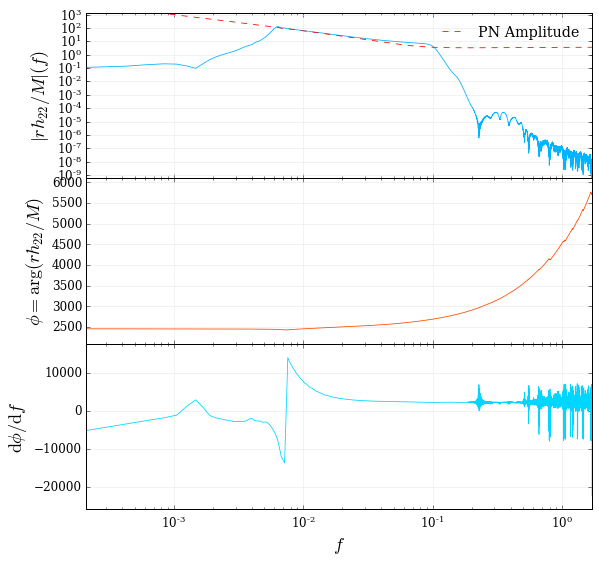

In [75]:
# select multipole l and m
mode = (2,2)
# Plot frequency domain waveform data
ax,fig = y.lm[mode]['strain'].plot(domain='freq')
# Add the PN amplitude to the plot 
f = y.lm[mode]['strain'].f; f = f[ f>0 ]
hfpn_amp = pn.hf_amp_np( f, y.eta, y.X1[-1], y.X2[-1], mode )
ax[0].plot( f, hfpn_amp, '--r', label='PN Amplitude' )
ax[0].legend(frameon=False)

## Comapre PN with NR for all Loaded multipoles

In [78]:
# Add the PN amplitude to the plot 
pn_alm = {}
for mode in y.lm:
    f = y.lm[mode]['strain'].f; f = f[ f>0 ]
    pn_alm[mode] = pn.hf_amp_np( f, y.eta, y.X1[-1], y.X2[-1], mode )

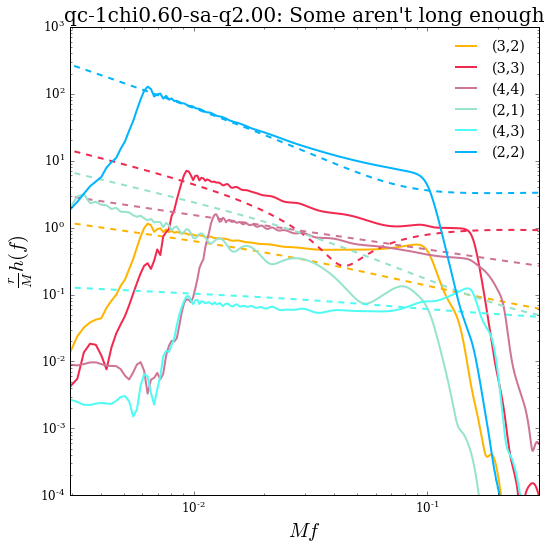

In [122]:
fig = figure( figsize = 1.68*array([5,5]) )
clr = rgb( len(y.lm), reverse=True,  )
for k,mode in enumerate(y.lm):
    hlm = y.lm[mode]['strain']
    f = hlm.f; mask = f>0
    plot( f[mask], hlm.fd_amp[mask], color=clr[k], linewidth=2, label='(%i,%i)'%mode  )
    plot( f[mask], pn_alm[mode], color=0.99*clr[k], linestyle='--', linewidth=2)
#
xscale('log'); yscale('log')
xlim( [y.wstart/(4*pi),0.3] )
ylim( [1e-4,1e3] )
xlabel('$Mf$')
ylabel(r'$\frac{r}{M}h(f)$')
legend(frameon=False)
title('%s: Some aren\'t long enough'%y.label)

In [101]:
?rgb